<a href="https://colab.research.google.com/github/samuelsushanth/Telecom-Churn-Case-Study-Hackathon/blob/main/Telecom_customers_churn_case_study_samkol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 : Import the Libraries and Data

In [1]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import re
import os


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


import xgboost as xgb


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Read the data

data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(10193, 172)
(8746, 171)
(30000, 2)
(36, 2)


# Part 2: Take a look at the Data

In [ ]:
data

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0


In [ ]:
unseen

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,718.870,396.259,...,0,0,0,1.0,NaN,NaN,1255,3.71,105.64,61.48
29996,99995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,218.327,324.070,...,0,0,0,NaN,0.0,NaN,2258,0.00,0.00,0.00
29997,99996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,139.473,38.230,...,0,0,0,NaN,NaN,NaN,440,0.00,0.00,0.00
29998,99997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1122.912,781.121,...,0,0,0,NaN,NaN,NaN,810,0.00,0.00,0.00


In [ ]:
sample

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [ ]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


# Part 3: Data Analysis and Clean Up

In [ ]:
#The id column does not add any information
del data['id']

In [ ]:
#Remove all the columns that do not add any variance, i.e columns that have only one unique value
unique_1_col=[]
for i in data.columns:
    if data[i].nunique() == 1:
        unique_1_col.append(i)

data.drop(unique_1_col, axis=1, inplace = True)
print(unique_1_col)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [ ]:
#Check the amount of missing values in columns in percentage
missing_percent = (data.isnull().sum()/len(data.index)).sort_values(ascending=False)*100
missing_percent = missing_percent.reset_index()
missing_percent = missing_percent.rename({'index': 'Variable', 0: 'Missing_percent'}, axis=1)
missing_percent

,Variable,Missing_percent
0,av_rech_amt_data_6,74.902499
1,count_rech_3g_6,74.902499
2,arpu_3g_6,74.902499
3,arpu_2g_6,74.902499
4,max_rech_data_6,74.902499
...,...,...
153,vol_2g_mb_6,0.000000
154,vol_2g_mb_7,0.000000
155,vol_2g_mb_8,0.000000
156,vol_3g_mb_6,0.000000


In [ ]:
#Look at columns with more than 10 percent data missing
missing_percent_10 = missing_percent[missing_percent['Missing_percent']>10]
missing_percent_10

,Variable,Missing_percent
0,av_rech_amt_data_6,74.902499
1,count_rech_3g_6,74.902499
2,arpu_3g_6,74.902499
3,arpu_2g_6,74.902499
4,max_rech_data_6,74.902499
5,night_pck_user_6,74.902499
6,count_rech_2g_6,74.902499
7,date_of_last_rech_data_6,74.902499
8,total_rech_data_6,74.902499
9,fb_user_6,74.902499


In [ ]:
#Remove all columns missing more than 10 percent data as it will not be useful
for i in missing_percent_10['Variable']:
    del data[i]

In [ ]:
pd.DataFrame((data.isnull().sum()/len(data.index)).sort_values(ascending=False)*100).head(20)

,0
isd_og_mou_8,5.290076
std_ic_t2m_mou_8,5.290076
std_ic_t2f_mou_8,5.290076
std_og_t2f_mou_8,5.290076
std_og_t2t_mou_8,5.290076
loc_ic_t2f_mou_8,5.290076
loc_og_mou_8,5.290076
std_ic_mou_8,5.290076
loc_og_t2c_mou_8,5.290076
std_og_mou_8,5.290076


In [ ]:
#Get more information about the data and columns and their datatypes
data.info(verbose=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 128 columns):
 #    Column               Dtype  
---   ------               -----  
 0    arpu_6               float64
 1    arpu_7               float64
 2    arpu_8               float64
 3    onnet_mou_6          float64
 4    onnet_mou_7          float64
 5    onnet_mou_8          float64
 6    offnet_mou_6         float64
 7    offnet_mou_7         float64
 8    offnet_mou_8         float64
 9    roam_ic_mou_6        float64
 10   roam_ic_mou_7        float64
 11   roam_ic_mou_8        float64
 12   roam_og_mou_6        float64
 13   roam_og_mou_7        float64
 14   roam_og_mou_8        float64
 15   loc_og_t2t_mou_6     float64
 16   loc_og_t2t_mou_7     float64
 17   loc_og_t2t_mou_8     float64
 18   loc_og_t2m_mou_6     float64
 19   loc_og_t2m_mou_7     float64
 20   loc_og_t2m_mou_8     float64
 21   loc_og_t2f_mou_6     float64
 22   loc_og_t2f_mou_7     float64
 23   loc_og_t2

In [ ]:
#Get lists of object columns and columns with continuous data.
object_columns = []
continuous_columns = []


for column in data.columns:
    if data.dtypes[column] == 'object':
        object_columns.append(column)

for column in data.columns:
    if data.dtypes[column] != 'object':
        continuous_columns.append(column)

In [ ]:
#View Object Columns
object_columns

#It appears that the object columns is all dates

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [ ]:
#Convert the object columns to datetime format
for i in object_columns:
    data[i] = pd.to_datetime(data[i])

In [ ]:
#Convert the date time to days. This is the nomber of days since the most recent datetime in that particular column
for i in object_columns:
    data[i] = data[i].max() - data[i]
    data[i] = data[i].dt.days

# Part 4: Handling missing Data and preparing it to build models

In [ ]:
# Split the data into train and test
X = data.iloc[:,:-1]
y = data.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 127), (14000, 127), (55999,), (14000,))

In [ ]:
#Fill the missing values with the median
missing_data_percent = X_train.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

imp = SimpleImputer(strategy='median')
X_train[impute_cols] = imp.fit_transform(X_train[impute_cols])

In [ ]:
#Fill the missing data in the test set with the median
missing_data_percent = X_test.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

imp = SimpleImputer(strategy='median')
X_test[impute_cols] = imp.fit_transform(X_test[impute_cols])

<AxesSubplot:>

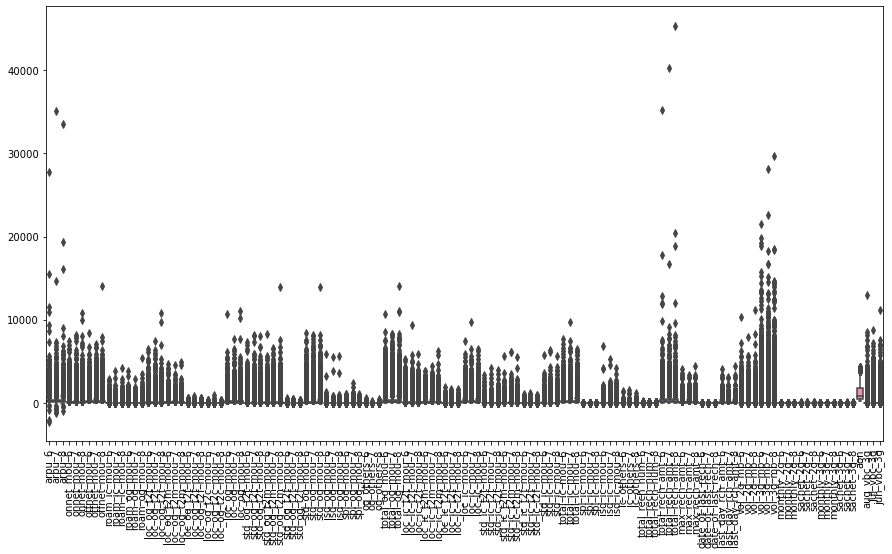

In [ ]:
#Visualize the data with box plots
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = X_train)

#Here it can be seen that there are many outliers present in the data

In [ ]:
#Function to remove Outliers
def cap_outliers(array, k=4):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

<AxesSubplot:>

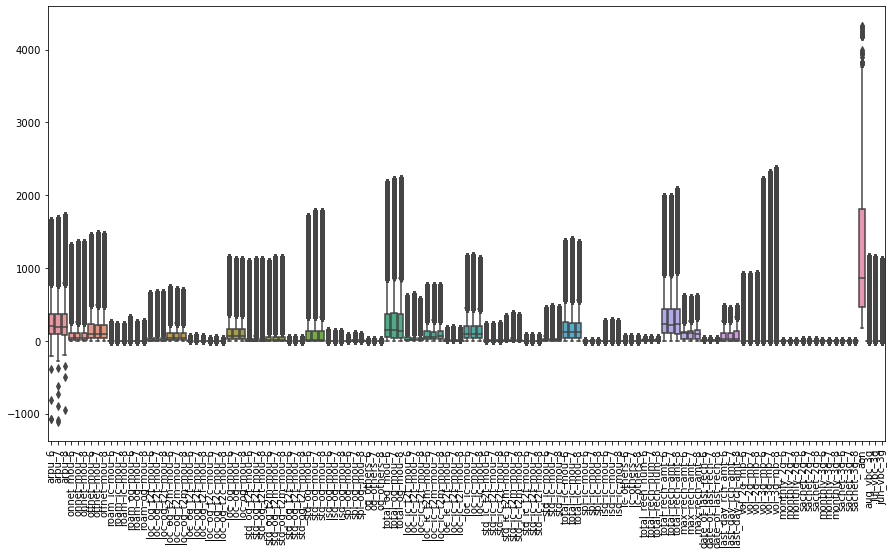

In [ ]:
#Remove the Outliers from the data
X_train_outliers_removed = X_train.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = X_train_outliers_removed)

#From the plot below we can see that the data is not scaled, we need ot sclae in order to make sure all variable have equal weights

In [ ]:
#Scale the Data with Satandard Scaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train_outliers_removed)
X_test_scaled = scale.transform(X_test)

<AxesSubplot:>

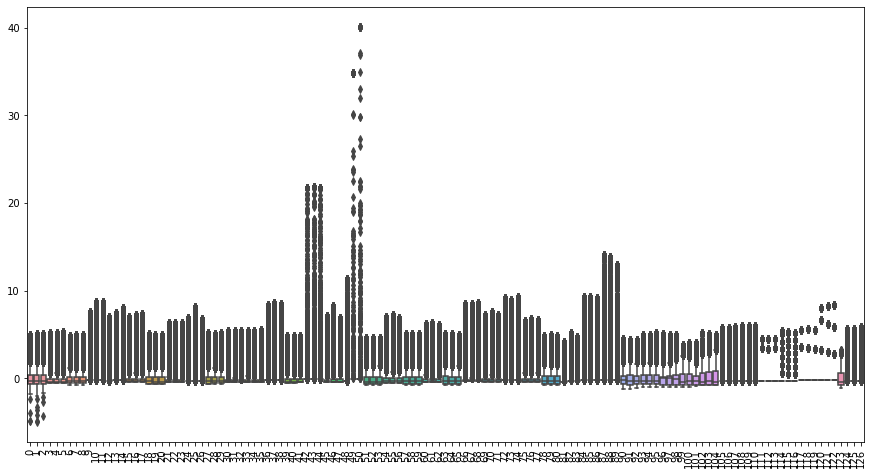

In [ ]:
#Plot scaled data
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = X_train_scaled)

#From the data below we can see that the data is much more uniform

# Part 5: Building Models

### The first model we will build is a Random Forests

In [ ]:
#Build a Logistic Regression Model
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [ ]:
#Check the Training Score of the Model
lr.score(X_train_scaled, y_train)

0.9317309237664958

In [ ]:
#Test the Accuracy on Test Data
lr.score(X_test_scaled, y_test)

0.9257857142857143

### The basing Logistic Regression Model has a really good train and test Score

### The next Model we will build is a Random Forests

In [ ]:
#Building Random Forest Model
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [ ]:
#The training Accuracy is 1, which is expected of Random Forests and Decision Trees
rf.score(X_train_scaled, y_train)

1.0

In [ ]:
#Test the Accuracy on Test Data
rf.score(X_test_scaled, y_test)

0.9402142857142857

In [ ]:
#Find the most important Features of the Random Forest
feature_importances = pd.DataFrame({'col':X_train.columns, 'importance':rf.feature_importances_})

<BarContainer object of 127 artists>

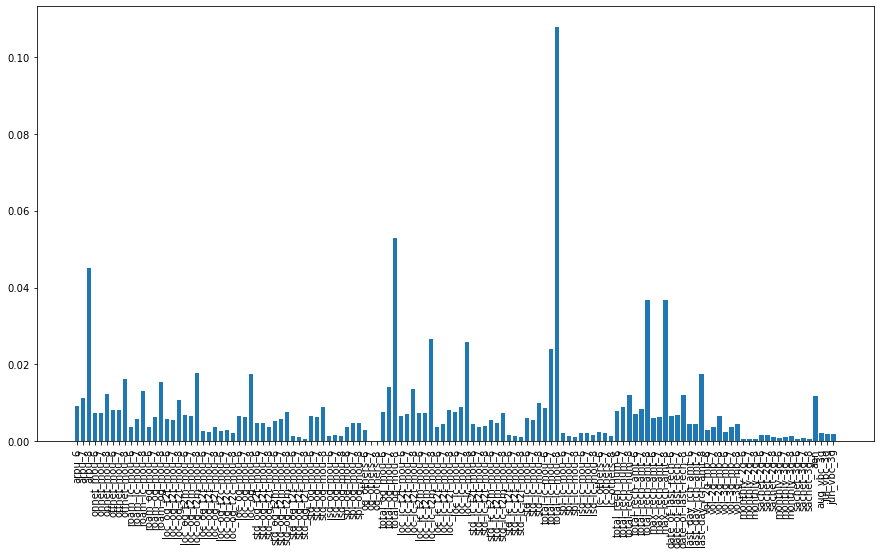

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

### The Random Forest did better than the Logistic Regression Model on the Test Data

### Lets build a Boosing Model using XGBoost

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_jobs = -1, objective='binary:logistic')
xgb_classifier.fit(X_train_scaled, y_train)

[20:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_classifier.score(X_train_scaled, y_train)

0.9812496651725924

In [ ]:
xgb_classifier.score(X_test_scaled, y_test)

0.9390714285714286

### The Boosting Model did better than the Logistic Regression Model but is on par with the Random Forests model

## Now Lets try Usinc PCA and use only the most significant components

In [ ]:
#Compute PCA and get the Components
pca = PCA()
pca_components = pca.fit_transform(X_train_scaled)

<AxesSubplot:>

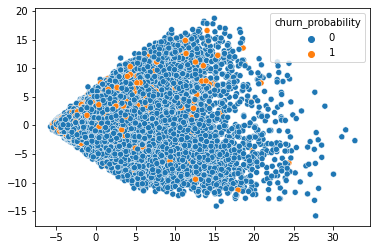

In [ ]:
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

<AxesSubplot:>

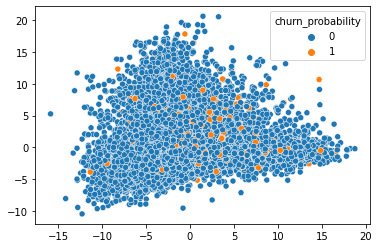

In [ ]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

<AxesSubplot:>

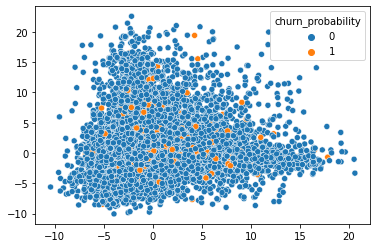

In [ ]:
sns.scatterplot(x=pca_components[:,2], y=pca_components[:,3], hue=y_train)

### Lets Build Logistic Regression Using 2 PCA Components

In [ ]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
lr.fit(pca_components[:,:10], y_train)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [ ]:
lr.score(pca_components[:,:10], y_train)

0.900873229879105

In [ ]:
#Building a Pipeline to Evaluate model on Test Data
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=10)
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')

pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model',
                 LogisticRegression(max_iter=1000, solver='sag', tol=0.001))])

In [ ]:
#Cheching the Train Score
pipe.score(X_train, y_train)

0.9009089448025858

In [ ]:
#Cheching the Test Score
pipe.score(X_test, y_test)

0.8977857142857143

In [ ]:
#Looking at the Condusion Matrix
print('Training Confusion Matrix')
print(confusion_matrix(y_train, pipe.predict(X_train)))
print('Testing Confusion Matrix')
print(confusion_matrix(y_test, pipe.predict(X_test)))

Training Confusion Matrix
[[49760   561]
 [ 4988   690]]
Testing Confusion Matrix
[[12352   194]
 [ 1237   217]]


In [ ]:
print('Precision Score:')
print(precision_score(y_test, pipe.predict(X_test)))
print('Recall Score:')
print(recall_score(y_test, pipe.predict(X_test)))

Precision Score:
0.5279805352798054
Recall Score:
0.14924346629986246


### We can get very close to the Original Logistic Model by using only 10 Components

### Let's try building a boosting model using 10 components

In [ ]:
#Create and instance of XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_jobs=-1, objective='binary:logistic')

In [ ]:
#Build a Random Search Model to find the best Parameters

params = {
    'n_estimators': [100, 200, 500, 750, 1000],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1],
    'min_child_weight': [1, 2, 3, 5],
    'gamma': [0.1, 0.5, 1, 1.5, 2],
    'subsample': [0.2, 0.4, 0.6, 0.8, 1],
    'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
    'max_depth': [3, 4, 5, 10]
}

folds=3
param_comp=200

random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, n_jobs=-1, cv=3, verbose=3, random_state=0)

In [ ]:
random_search.fit(pca_components[:,:25], y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[20:41:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [ ]:
random_search.score(pca_components[:,:25], y_train)

0.954231325559385

In [ ]:
random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 750,
 'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 2,
 'colsample_bytree': 1}

### We can see that the best value for XGBoost are
- subsample=0.8
- n_estimators=750
- min_child_weight=3
- max_depth=5
- learning_rate=0.05
- gamma=2
- colsample_bytree=1

In [ ]:
#Building a Pipeline using the Above Parameter Values to Evaluate model on Test Data
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=25)
xgb_classifier = xgb.XGBClassifier(n_jobs = -1, objective='binary:logistic', subsample=0.8, n_estimators=500, min_child_weight=3,
                                   max_depth=5, learning_rate=0.05, gamma=2, colsample_bytree=1)

pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',xgb_classifier)])

pipe.fit(X_train, y_train)

[20:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=25)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=2, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=3, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=-1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.8,
        

In [ ]:
#Cheching the Train Score
pipe.score(X_train, y_train)

0.9410882337184593

In [ ]:
#Cheching the Test Score
pipe.score(X_test, y_test)

0.9109285714285714

In [ ]:
#Looking at the Condusion Matrix
print('Training Confusion Matrix')
print(confusion_matrix(y_train, pipe.predict(X_train)))
print('Testing Confusion Matrix')
print(confusion_matrix(y_test, pipe.predict(X_test)))

Training Confusion Matrix
[[49677   644]
 [ 2655  3023]]
Testing Confusion Matrix
[[12212   334]
 [  913   541]]


In [ ]:
print('Precision Score:')
print(precision_score(y_test, pipe.predict(X_test)))
print('Recall Score:')
print(recall_score(y_test, pipe.predict(X_test)))

Precision Score:
0.6182857142857143
Recall Score:
0.37207702888583216


### We can see that the Boositng Score is slightly Better than the Logistic Regression Score

# Part 6: Creating the Final Submission File

In [ ]:
col_names = list(X_train.columns.values)
col_names.append('id')

In [ ]:
submission_data = unseen
submission_data = submission_data[X_train.columns]
submission_data.shape

(30000, 127)

In [ ]:
for i in object_columns:
    submission_data[i] = pd.to_datetime(submission_data[i])

for i in object_columns:
    submission_data[i] = submission_data[i].max() - submission_data[i]
    submission_data[i] = submission_data[i].dt.days

In [ ]:
unseen['churn_probability'] = pipe.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [ ]:
output.to_csv('samuel_kolli_final.csv',index=False)

# Part 7: Conclusion

### Using the XGBootClassifier Model with 25 PCA is a good choice because if we go for higher number of components, the computation time is increase exponentially and therefore it is not worth it for a marginal increase in accuracy.